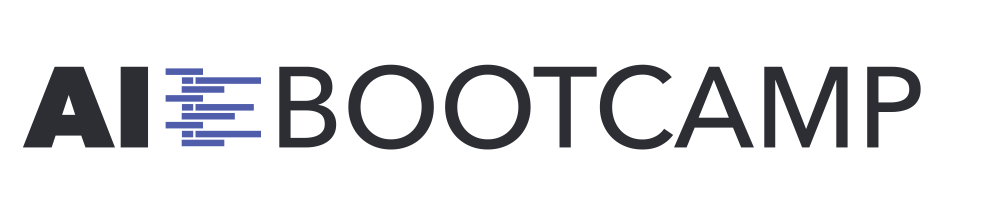

# AI Bootcamp: Unsupervised Machine Learning

## Tutorial on Iris Dataset
In this tutorial, we will walk through an example of dimensional reduction on the Iris flower dataset.

For more information of the Iris dataset, please check here: https://en.wikipedia.org/wiki/Iris_flower_data_set  
You will explore the data in Task 1.

In [2]:
from sklearn.datasets import load_iris
from sklearn import decomposition
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the dataset
iris_data = load_iris() 

### Task 1: Exploratory Data Analysis (EDA) on Iris

In [4]:
iris_features = iris_data['data']
iris_target = iris_data['target']

#### Task 1.1
How do each feature relate to each other? Could you generate 2D scatter plots for every possible pair of four features? How many plots do we need for this task?

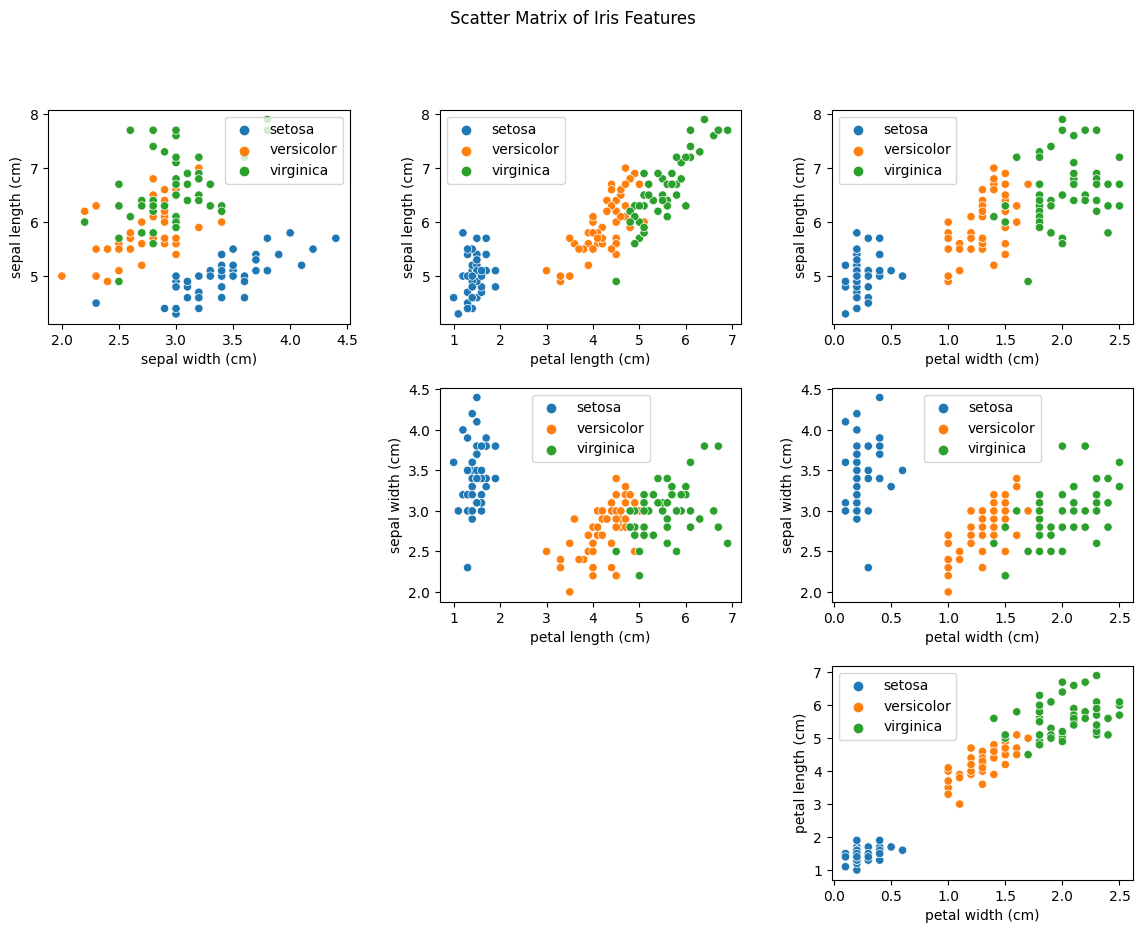

In [11]:
# Your code here
iris_feature_names = iris_data['feature_names']
iris_target_names = iris_data['target_names']

plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Loop to create scatter plots
for row in range(1, 4):
    for col in range(row):
        ax = plt.subplot(3, 3, row + 3 * col)
        
        sns.scatterplot(
            x=iris_features[:, row], 
            y=iris_features[:, col], 
            hue=iris_target_names[iris_target],
            ax=ax
        )
        
        ax.set_xlabel(iris_feature_names[row])
        ax.set_ylabel(iris_feature_names[col])

### Task 2: Use PCA with Sklearn

An example of using pca with sklearn package is provided.

In [7]:
pca = decomposition.PCA(n_components=2) # 2-D PCA
pca.fit(iris_features) # Fit the model with iris_features
X = pca.transform(iris_features) # Apply the dimensionality reduction on iris_features

In [8]:
# Take a look at the shape of X after transformation
X.shape

(150, 2)

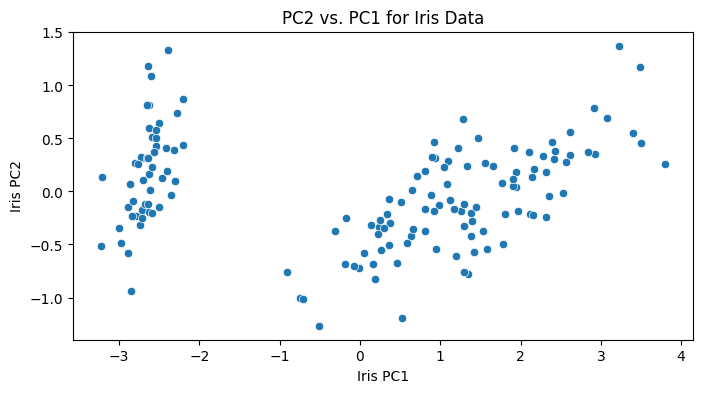

In [9]:
# Plot the 2-D PCA
plt.figure(figsize = (8, 4))
plt.title("PC2 vs. PC1 for Iris Data")
plt.xlabel("Iris PC1")
plt.ylabel("Iris PC2")
sns.scatterplot(x = X[:, 0], y = X[:, 1]);

#### Task 2.1
If we don't know the classification of samples, how many types of Iris will you propose just from this scatter plot? Does it capture the significant variances of different Iris types?

*Your answer here*

Could you label points based on iris_targets (it's not unsupervised learning with labels)? Is the classification expected?

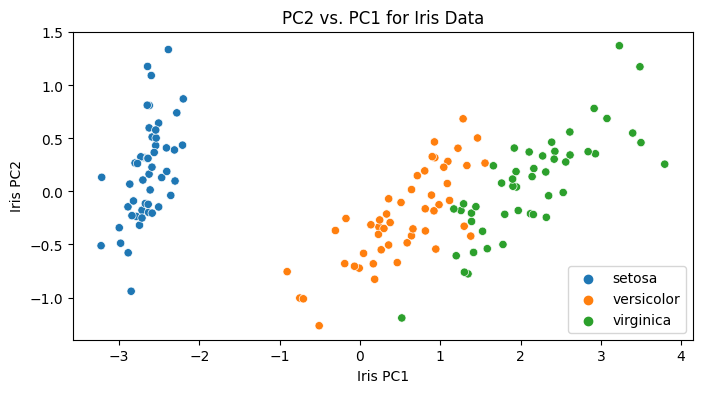

In [12]:
# Your code here
plt.figure(figsize = (8, 4))
plt.title("PC2 vs. PC1 for Iris Data")
plt.xlabel("Iris PC1")
plt.ylabel("Iris PC2")
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = iris_target_names[iris_target]);

#### Task 2.2 
Run the PCA with num_component = 3, and visualize your results. Does it perform a better job?

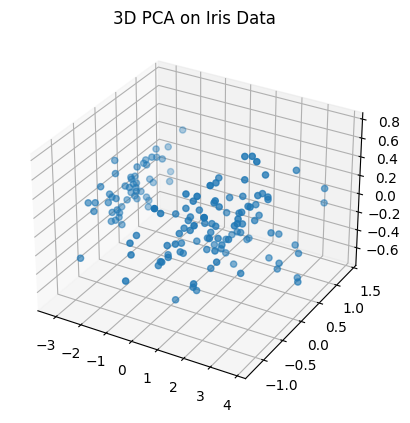

In [13]:
# Your code here
pca = decomposition.PCA(n_components=3) # 3-D PCA
pca.fit(iris_features) # Fit the model with iris_features
X = pca.transform(iris_features) # Apply the dimensionality reduction on iris_features

# Plot the 3-D PCA
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_title("3D PCA on Iris Data")

ax.scatter(X[:, 0], X[:, 1], X[:, 2]);
plt.show()

### Task 3: K-means Clustering

An example of using KMeans with sklearn package is provided.

In [15]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(iris_features)
y_kmeans = kmeans.predict(iris_features)

/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

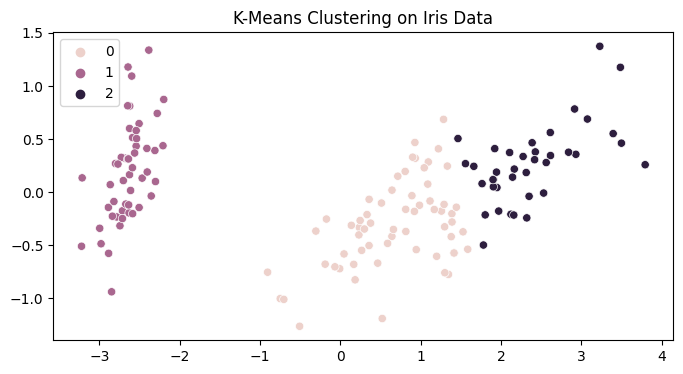

In [31]:
plt.figure(figsize = (8, 4))
plt.title("K-Means Clustering on Iris Data")
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_kmeans); 

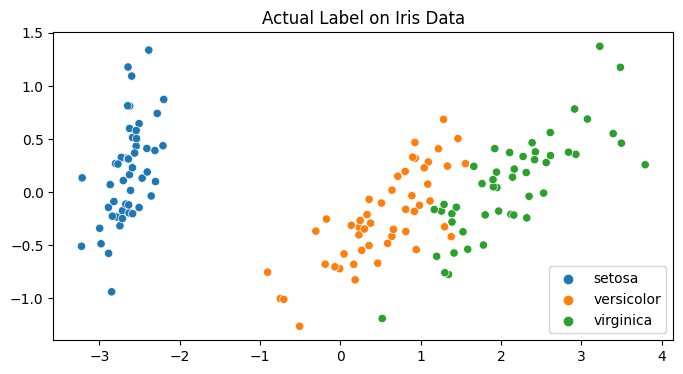

In [27]:
# Actual label
plt.figure(figsize = (8, 4))
plt.title("Actual Label on Iris Data")
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = iris_target_names[iris_target]); 

#### Task 3.1
Map each clustering index into a type of Iris by comparing K-means clustering and actual labels on Iris Data. 

In [32]:
# Your code here
iris_target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
y_kmeans = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)

#### Task 3.2
Compute the Error Rate of K-means clustering with k = 3

In [35]:
# Your code here
from sklearn.metrics import confusion_matrix
E = confusion_matrix(iris_target, y_kmeans)
num_error = np.sum(E) - np.trace(E)
error_rate = num_error / np.sum(E)
print("Number of errors: ", num_error)
print("Error rate: ", error_rate)

Number of errors:  16
Error rate:  0.10666666666666667


#### Task 3.3
Determine the **Optimal Clustering Number** by Elbow Method.
Plot your observation.

Take a look at the documentation of kmeans in sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Is there any attribute you can use in this task?

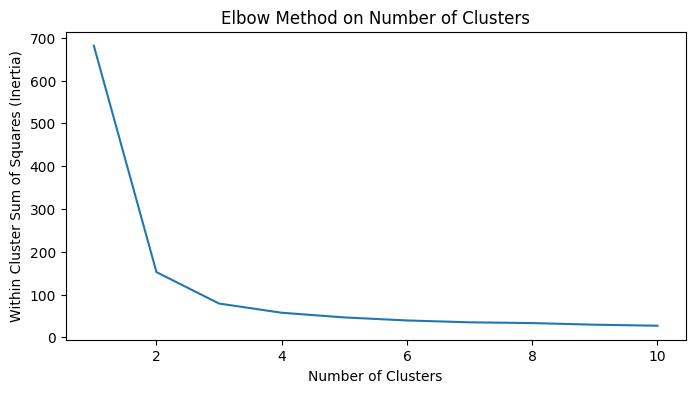

In [38]:
# Your code here

intertias = []

for num_cluster in range(1, 11):
    kmeans = KMeans(n_clusters=num_cluster, random_state=0, n_init='auto')
    kmeans.fit(iris_features)
    intertias.append(kmeans.inertia_)

plt.figure(figsize = (8, 4))
plt.title("Elbow Method on Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (Inertia)")
plt.plot(range(1, 11), intertias);
plt.show()    

From your plot, what is the optimal clustering number and why?

*Your answer here*